In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
from scipy.stats import mannwhitneyu


# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


### Read in data
Read in the viable and inviable ChIP data

In [2]:
viable = np.loadtxt('data/viable.csv')
inviable  = np.loadtxt('data/inviable.csv')

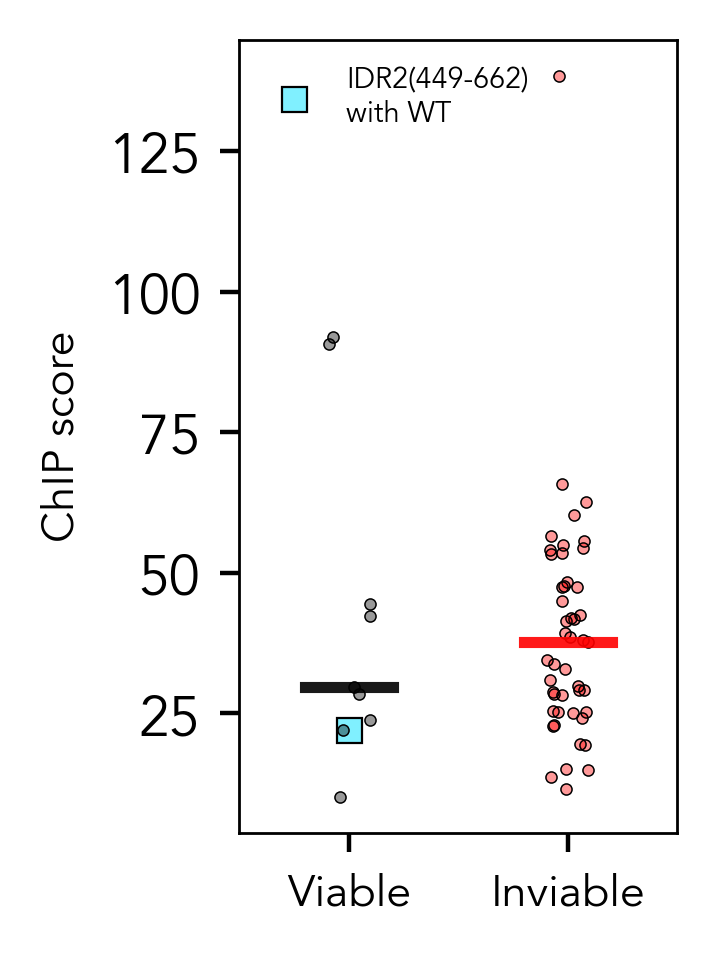

In [3]:
figure(num=None, figsize=(1.9, 2.5), dpi=200, facecolor='w', edgecolor='k')


# define random jitter 
jitter = np.random.uniform(size=len(viable))*0.2-0.10

plt.plot([1], [22],'sk', markerfacecolor='#80f0ff', ms=4.5, mew=0.4, alpha=1, mec='black', label='IDR2(449-662)\nwith WT')
#plt.plot(jitter[1]+1, viable[1],'sk', markerfacecolor='#80f0ff', ms=3.5, mew=0.1, alpha=1,mec='black')

plt.plot(jitter+1, viable,'o',alpha=0.4, ms=2, color='black', markeredgecolor='k',mew=0.25)

# this line plots solid boundaries

plt.plot(jitter+1, viable,'o',alpha=1, ms=2, color='None', markeredgecolor='k',mew=0.25)

jitter = np.random.uniform(size=len(inviable))*0.2-0.1
plt.plot(jitter+2, inviable,'o',alpha=0.4, ms=2, color='red', markeredgecolor='k', mew=0.25)
plt.plot(jitter+2, inviable,'o',alpha=1, ms=2, color='None', markeredgecolor='k',mew=0.25)


median_viable = np.median(viable)
median_inviable = np.median(inviable)

plt.plot([1-0.2,1+0.2], [median_viable, median_viable],'-k', linewidth=2, alpha=0.9)

plt.plot([2-0.2, 2+0.2], [median_inviable, median_inviable],'-r', linewidth=2, alpha=0.9)

plt.xlim([0.5, 2.5])
#plt.yticks([20,40,60], fontsize=8)
plt.ylabel(r'ChIP score', fontsize=8)
plt.xticks([1,2],['Viable','Inviable'], fontsize=8)
plt.legend(frameon=False, fontsize=5.2)
plt.tight_layout()
plt.savefig('figures/chip_comparison.pdf')





In [5]:
# viable vs. inviable
print('Mann Whitney U p Value = %1.5f'%(mannwhitneyu(inviable, viable)[1]))

# Compare inviable to a situation where WT Abf1 is present in background of viable constructs (mimick situation for inviable constructs) - 
# note that viable[0] and viable[1] are both values where a viable construc was expressed in the PRESENCE of the wildtype Abf1, so binding
# of a FLAG-tagged construct is "competing" with endogenous Abf1 for Abf1 binding sites (mimicking the ChIP assay situation where we
# have to co-express an inviable construct with the endogenous Abf1 present.
print('Mann Whitney U p Value = %1.5f'%(mannwhitneyu(inviable, [viable[0],viable[1]])[1]))


Mann Whitney U p Value = 0.80614
Mann Whitney U p Value = 0.23504
